In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#changing index into Passenger id
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


C:\Users\XArchitecture\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

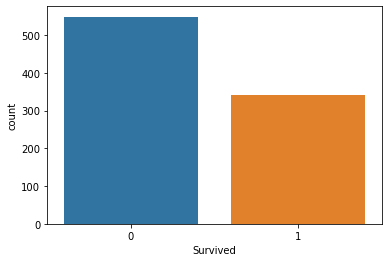

In [6]:
sns.countplot(data['Survived'])

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
clm=['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare','Embarked']

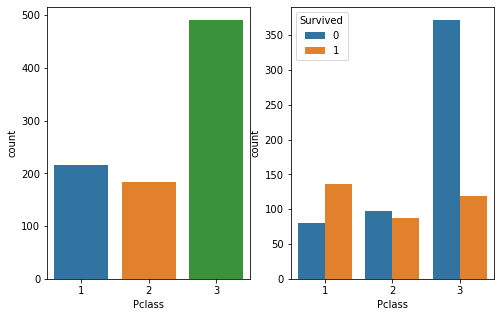

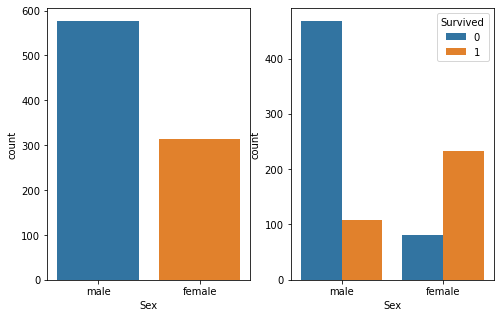

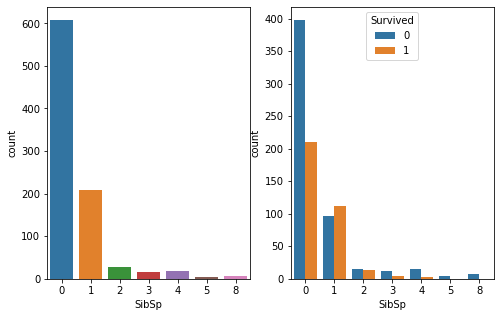

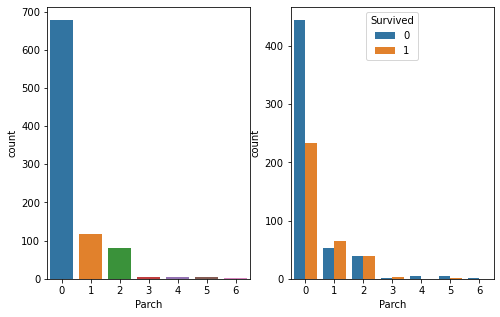

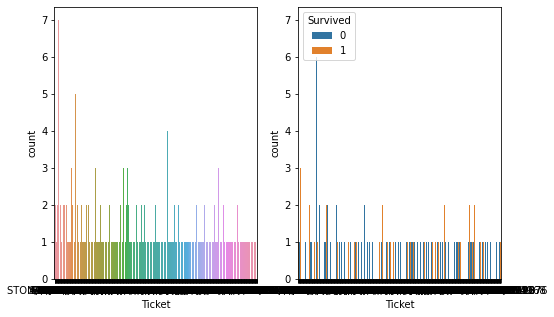

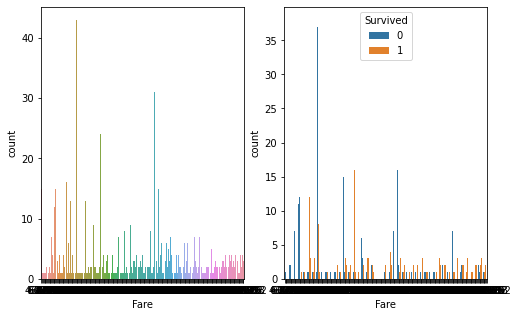

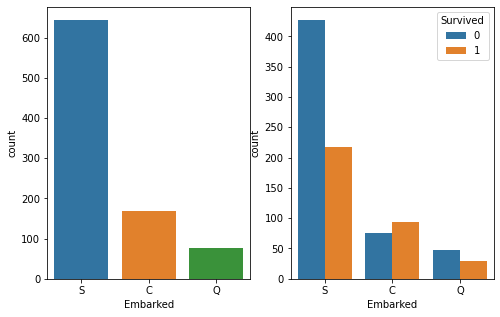

In [9]:
for i in clm:
   
    plt.figure (figsize=(8,5))
    plt.subplot(1,2,1)
    sns.countplot(x=data[i],data=data)
        
    plt.subplot(1,2,2)
    sns.countplot(x=data[i],hue='Survived',data=data)
    plt.show()

In [10]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
data['Title'] = data['Title'].map(title_mapping)

data.drop('Name', axis=1, inplace=True)

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [12]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data=data.drop('Cabin',axis=1)

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}

for i in ['Sex','Embarked','Title']:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i]) 

In [18]:
intervals=pd.cut(data['Age'],5)
bins=intervals.dtype.categories
bins

IntervalIndex([(0.34, 16.336], (16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (64.084, 80.0]], dtype='interval[float64, right]')

In [19]:
data['Age_binned']=pd.cut(data['Age'],bins=bins)
d={val:i for i,val in enumerate(bins)}
data['Age']=data['Age_binned'].map(lambda interval: d[interval])
data['Age']=data['Age'].astype(int)


In [20]:
fareintervals=pd.qcut(data['Fare'],4)
bins1=fareintervals.dtype.categories
bins1

IntervalIndex([(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0], (31.0, 512.329]], dtype='interval[float64, right]')

In [21]:
data['Fare_binned']=pd.cut(data['Fare'],bins=bins1)
d1={ val1: j for j,val1 in enumerate (bins1) }
data['Fare']=data['Fare_binned'].map(lambda interval: d1[interval])
data['Fare']=data['Fare'].fillna(0)
data['Fare']=data['Fare'].astype(int)



In [22]:
data=data.drop(['Age_binned','Fare_binned'],axis=1)

In [23]:
data['Fam_size']=data['SibSp']+data['Parch']+1
data=data.drop(['SibSp','Parch'],axis=1)

In [24]:
data.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Fam_size
PassengerId,,,,,,,,,
1,0,3,1,1,A/5 21171,0,2,0,2
2,1,1,0,2,PC 17599,3,0,2,2
3,1,3,0,1,STON/O2. 3101282,1,2,1,1
4,1,1,0,2,113803,3,2,2,2
5,0,3,1,2,373450,1,2,0,1
6,0,3,1,1,330877,1,1,0,1
7,0,1,1,3,17463,3,2,0,1
8,0,3,1,0,349909,2,2,3,5
9,1,3,0,1,347742,1,2,2,3


In [25]:
data.tail()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Fam_size
PassengerId,,,,,,,,,
887,0,2,1,1,211536,1,2,3,1
888,1,1,0,1,112053,2,2,1,1
889,0,3,0,1,W./C. 6607,2,2,1,4
890,1,1,1,1,111369,2,0,0,1
891,0,3,1,1,370376,0,1,0,1


<AxesSubplot:>

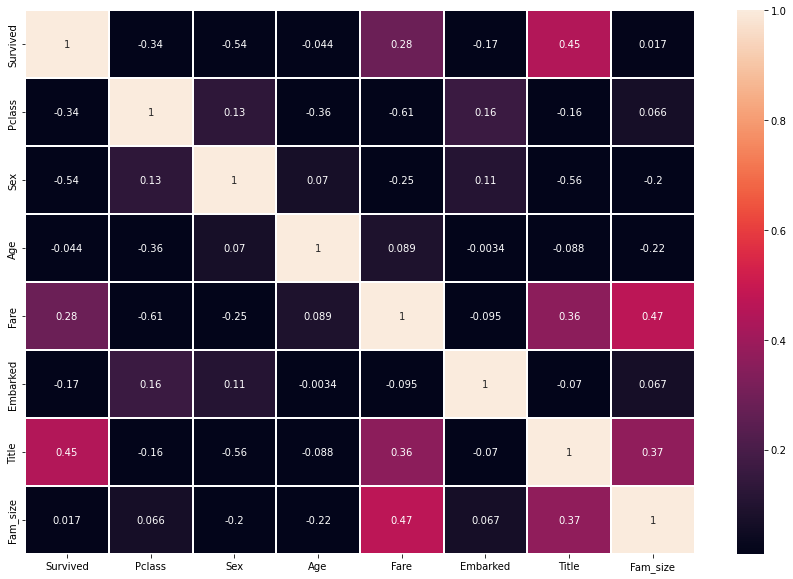

In [26]:

plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),vmin=0.01,vmax=1,annot=True,linewidth=0.2)

features are not highly correlated

In [27]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Title', 'Fam_size'],
      dtype='object')

In [28]:
x=data.drop(['Ticket','Survived'],axis=1)
y=data['Survived']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_test=scaler.fit_transform(x_test)
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)                  

In [31]:
x_train.shape

(668, 7)

In [32]:
#Modelilng

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [34]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(pred,y_test))
print('The Precision of the NaiveBayes is',precision_score(pred,y_test))
print('The REcall of the NaiveBayes is',recall_score(pred,y_test))
print('The f1 of the NaiveBayes is',f1_score(pred,y_test))

The accuracy of the NaiveBayes is 0.7847533632286996
The Precision of the NaiveBayes is 0.797752808988764
The REcall of the NaiveBayes is 0.7029702970297029
The f1 of the NaiveBayes is 0.7473684210526316


In [35]:
print("Confusion Matrix \n" ,confusion_matrix(pred,y_test))

Confusion Matrix 
 [[104  18]
 [ 30  71]]


In [36]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(pred,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.776119,0.852459,0.812500,122.000000
1,0.797753,0.702970,0.747368,101.000000
accuracy,0.784753,0.784753,0.784753,0.784753
macro avg,0.786936,0.777715,0.779934,223.000000
weighted avg,0.785917,0.784753,0.783001,223.000000


In [37]:
#hyperparametric tuning

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
                    ('pca', PCA()),
                    ('estimator', GaussianNB()),
                    ])
    
parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9]}
Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(x_train, y_train)
print(Bayes.best_estimator_)
print('best score:')
print(Bayes.best_score_)
predictions = Bayes.best_estimator_.predict(x_test)

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-11))])
best score:
0.8069877883310719


In [39]:

print(predictions)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0]


In [40]:
print('The accuracy of the NaiveBayes is',accuracy_score(predictions,y_test))
print('The Precision of the NaiveBayes is',precision_score(predictions,y_test))
print('The REcall of the NaiveBayes is',recall_score(predictions,y_test))
print('The f1 of the NaiveBayes is',f1_score(predictions,y_test))

The accuracy of the NaiveBayes is 0.7937219730941704
The Precision of the NaiveBayes is 0.7640449438202247
The REcall of the NaiveBayes is 0.7311827956989247
The f1 of the NaiveBayes is 0.7472527472527474


In [41]:
print("Confusion Matrix \n" ,confusion_matrix(pred,y_test))

Confusion Matrix 
 [[104  18]
 [ 30  71]]


In [42]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(predictions,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.813433,0.838462,0.825758,130.000000
1,0.764045,0.731183,0.747253,93.000000
accuracy,0.793722,0.793722,0.793722,0.793722
macro avg,0.788739,0.784822,0.786505,223.000000
weighted avg,0.792836,0.793722,0.793018,223.000000
